In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
from matplotlib.colors import ListedColormap
import pickle
import os
import sys
import time

if 'path' in locals(): os.chdir(path)
else: os.chdir("../"); path = os.getcwd()
print("The path is:", path)
path_manustript = path + "/Manuscript_Results/"
path_SI = path_manustript + "Figure_SI/"


from pyMFI import MFI
from pyMFI import MFI1D
from pyMFI import run_plumed


from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.size": 22, "font.family": "serif", "font.serif": ["computer modern roman"]})
plt.rcParams.update({"font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

times = r"$\times$"
pwr_neg = r"$^{-1}$"

os.chdir(path_SI)
print("The current path is:", path)


The path is: /home/ucecabj/Desktop/MFI_git
The current path is: /home/ucecabj/Desktop/MFI_git


### 1D Analytical Surface

In [2]:
from pyMFI import MFI1D
from pyMFI import run_plumed


#Simulation steps and analytical function as string
n_steps = 2000000
f = "1*x^8-50*exp(-(x-1)^2/0.1)-93*exp(-(x+0.5)^2/0.05)-103*exp(-(x+1.5)^2/0.07)-70*exp(-(x)^2/0.03)+50*exp(-(x-0.5)^2/0.03)"

#Run Metadynamics simulation on custom potential
# run_plumed.run_langevin1D(analytical_function = f, temperature=1, simulation_steps = n_steps ,gaus_width=0.1, gaus_height=2.5, biasfactor=20, gaus_pace=100)

#Read the HILLS file
HILLS = MFI1D.load_HILLS(hills_name="HILLS1")

#Read the COLVAR File
position = MFI1D.load_position(position_name="position1")

#Compute the time-independent mean force
results = MFI1D.MFI_1D(HILLS = HILLS, position = position, bw = 0.03, kT = 1, log_pace = 4000, error_pace = 200, min_grid=-2, max_grid=2, nbins=401, WellTempered=1, use_weighted_st_dev=False)
X, Ftot_den, Ftot_den2, Ftot, ofv_num, FES, ofv, ofe, cutoff, error_evol, fes_error_cutoff_evol = results

#integration on a non-periodic domain
FES = MFI1D.intg_1D(Ftot, X[1]-X[0])
y_ref = y=1*X**8-50*np.exp(-(X-1)**2/0.1)-93*np.exp(-(X+0.5)**2/0.05)-103*np.exp(-(X+1.5)**2/0.07)-70*np.exp(-(X)**2/0.03)+50*np.exp(-(X-0.5)**2/0.03)
y_ref = y_ref - min(y_ref)

Ftot_den_1, Ftot_den2_1, Ftot_1, ofv_num_1 = Ftot_den, Ftot_den2, Ftot, ofv_num


20.0 %   OFE = 6.7855
40.0 %   OFE = 2.7864
60.0 %   OFE = 3.1216
80.0 %   OFE = 2.2061
100.0 %   OFE = 6.8207


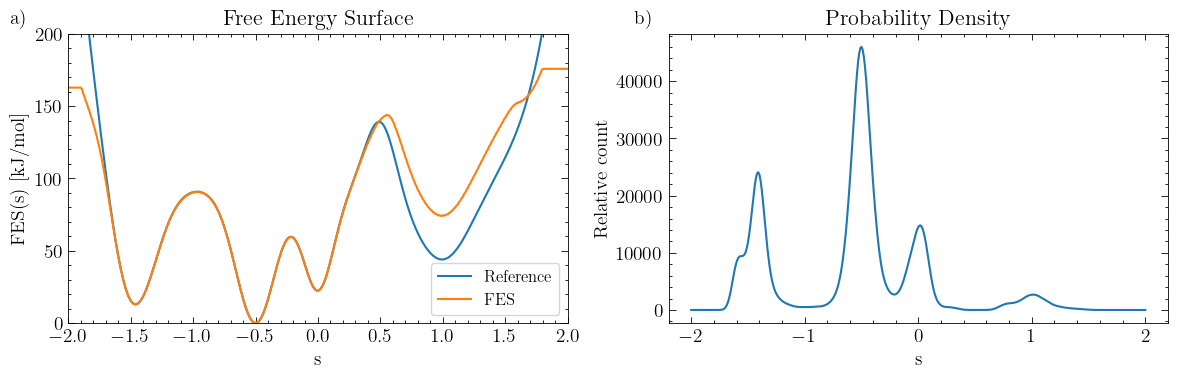

In [3]:
plt.rcParams.update({"font.size": 14})

#plot results
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(X,y_ref, label="Reference")
plt.plot(X,FES, label="FES")
plt.title("Free Energy Surface", fontsize=16)
plt.xlabel("s", fontsize=14)
plt.ylabel("FES(s) [kJ/mol]", fontsize=14)
plt.legend(fontsize=12)
plt.ylim(0,200)
plt.xlim(-2,2)
plt.subplot(1,2,2)
plt.plot(X,Ftot_den)
plt.title("Probability Density", fontsize=16)
plt.xlabel("s", fontsize=14)
plt.ylabel("Relative count", fontsize=14)
plt.tight_layout()

plt.text(-8, 50000, "a)")
plt.text(-2.5, 50000, "b)")

plt.savefig(path_manustript + "Figure_SI/Figure_SI_1", dpi=300, transparent=True)
plt.show()

### Combining Two Simulation

In [4]:
#Save relevant force terms from first simulation
force_terms = [[Ftot_den_1, Ftot_den2_1, Ftot_1, ofv_num_1]]

#Run Metadynamics simulation on custom potential
# run_plumed.run_langevin1D(analytical_function = f, initial_position=1.0, temperature=1, simulation_steps = n_steps ,gaus_width=0.1, gaus_height=5, biasfactor=50, gaus_pace=100)

# #Read the HILLS and COLVAR file
HILLS = MFI1D.load_HILLS(hills_name="HILLS")
position = MFI1D.load_position(position_name="position")

# #Compute the time-independent mean force
results = MFI1D.MFI_1D(HILLS = HILLS, position = position, bw = 0.03, kT = 1, log_pace = 4000, error_pace = 200, min_grid=-2, max_grid=2, nbins=401, WellTempered=1, use_weighted_st_dev=False)
X, Ftot_den, Ftot_den2, Ftot, ofv_num, FES, ofv, ofe, cutoff, error_evol, fes_error_cutoff_evol = results

# #Combine the two results
force_terms.append([Ftot_den, Ftot_den2, Ftot, ofv_num])
Ftot_den_patch, Ftot_den2_patch, Ftot_patch, ofv_num_patch, ofe, Aofe_progression = MFI1D.patch_forces_ofe(np.asarray(force_terms), use_weighted_st_dev=False)


#integration on a non-periodic domain
FES = MFI1D.intg_1D(Ftot, X[1]-X[0])

20.0 %   OFE = 2.9898
40.0 %   OFE = 2.285
60.0 %   OFE = 1.9309
80.0 %   OFE = 1.6478
100.0 %   OFE = 1.6142


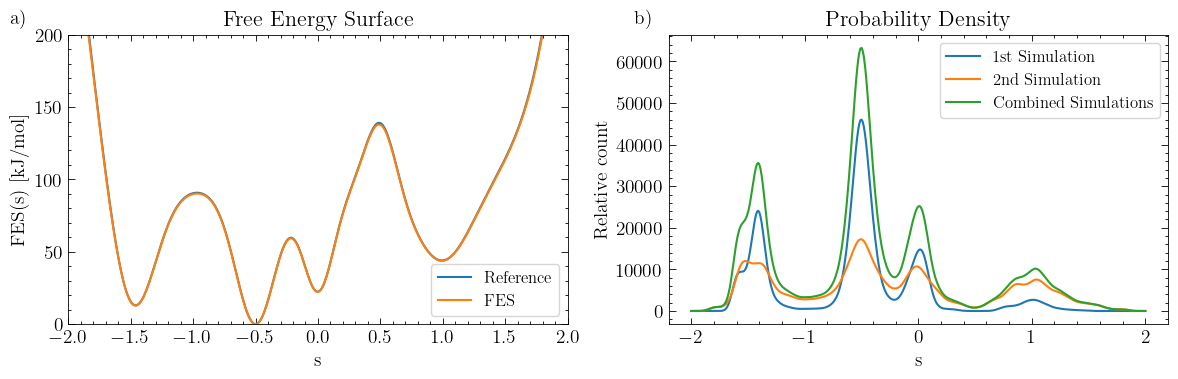

In [5]:
#plot results
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(X,y_ref, label="Reference")
plt.plot(X,FES, label="FES")
plt.title("Free Energy Surface", fontsize=16)
plt.xlabel("s", fontsize=14)
plt.ylabel("FES(s) [kJ/mol]", fontsize=14)
plt.legend(fontsize=12)
plt.ylim(0,200)
plt.xlim(-2,2)
plt.subplot(1,2,2)
plt.plot(X,Ftot_den_1, label="1st Simulation")
plt.plot(X,Ftot_den, label="2nd Simulation")
plt.plot(X,Ftot_den_patch, label="Combined Simulations")
plt.legend(fontsize=12)
plt.title("Probability Density", fontsize=16)
plt.xlabel("s", fontsize=14)
plt.ylabel("Relative count", fontsize=14)
plt.tight_layout()

plt.text(-8, 69000, "a)")
plt.text(-2.5, 69000, "b)")

plt.savefig(path_manustript + "Figure_SI/Figure_SI_2", dpi=300, transparent=True)
plt.show()

### 2D Analytical Surface

In [6]:
#Simulation steps and analytical function
n_steps = 1000000
grid = np.linspace(-3, 3, 200) 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)
f = "1.34549*x^4+1.90211*x^3*y+3.92705*x^2*y^2-6.44246*x^2-1.90211*x*y^3+5.58721*x*y+1.33481*x+1.34549*y^4-5.55754*y^2+0.904586*y+18.5598"

#Run Metadynamics simulation on custom potential
# run_plumed.run_langevin2D(simulation_steps=n_steps, analytical_function=f, gaus_width_x=0.1, gaus_width_y=0.1, gaus_height=0.5, biasfactor=10, gaus_pace=500, file_extension="_2D")

#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS_2D")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position_2D")

#COMPUTE Mean force and weight of the simulation
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = np.array((0.05, 0.05)), kT = 1, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), error_pace = 20, ref_fes=inve_pot, use_weighted_st_dev = False)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, aad_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

#integration on a non-periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))

#Save force terms from girst simulation
force_terms_2D = Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y
history_terms = volume_history, ofe_history, aad_history, time_history
ofe_1, FES_1, cutoff_1 = ofe, FES, cutoff

|*                                                 | 2% | Average Mean Force Error: 16.246

|**************************************************| 100% | Average Mean Force Error: 10.456

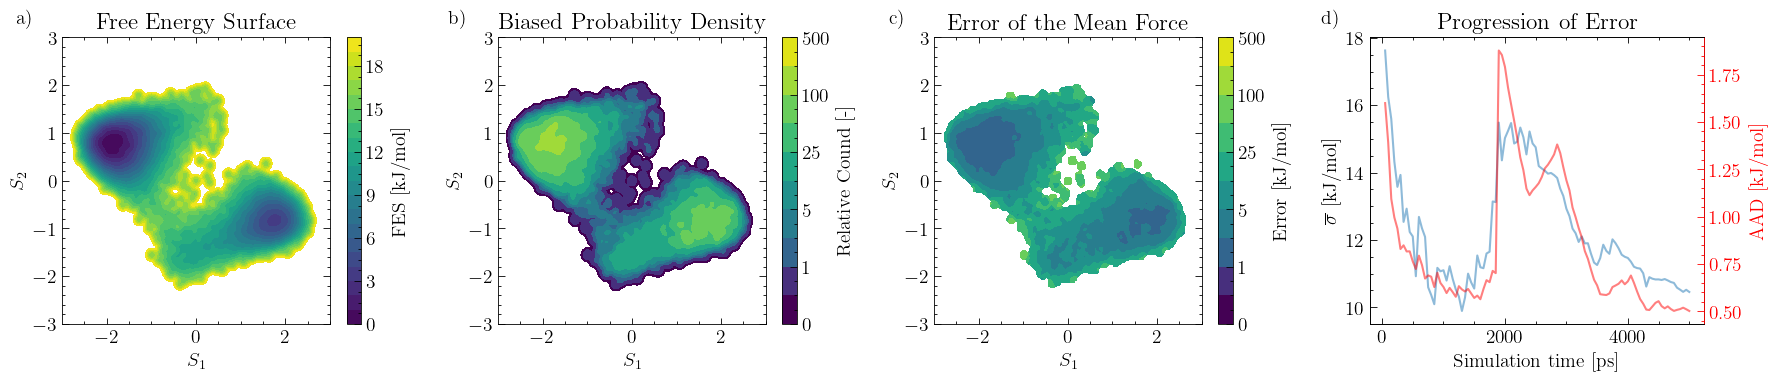

In [7]:
plt.rcParams.update({"font.size": 14})

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(18,4))

fig_fes = ax1.contourf(X,Y, FES_1, levels=np.linspace(0,20,21), cmap='viridis')
fig.colorbar(fig_fes, ax=ax1, label='FES [kJ/mol]')
ax1.set_title("Free Energy Surface"); ax1.set_xlabel("$S_1$"); ax1.set_ylabel("$S_2$")

PD_levels = [0.01, 0.1, 1, 2.5, 5, 10, 25, 50, 100, 225, 500]
PD_tick_loc = [0.01, 0.055, 0.1, 0.55, 1, 1.75, 2.5, 3.75, 5, 7.5, 10, 17.5, 25, 37.5, 50, 75, 100, 162.5, 225, 362.5, 500]

fig_PD = ax2.contourf(X,Y, MFI.zero_to_nan(force_terms_2D[0]), levels=PD_levels, cmap='viridis', norm=colors.LogNorm(vmin=0.1, vmax=500))
cbar_PD = fig.colorbar(fig_PD, ax=ax2, label='Relative Cound [-]')
cbar_PD.ax.yaxis.set_minor_locator(ticker.FixedLocator(PD_tick_loc))
ax2.set_title("Biased Probability Density"); ax2.set_xlabel("$S_1$"); ax2.set_ylabel("$S_2$")

ofe_levels = [0.01, 0.1, 1, 2.5, 5, 10, 25, 50, 100, 225, 500]
ofe_tick_loc = [0.01, 0.055, 0.1, 0.55, 1, 1.75, 2.5, 3.75, 5, 7.5, 10, 17.5, 25, 37.5, 50, 75, 100, 162.5, 225, 362.5, 500]

fig_ofe = ax3.contourf(X,Y, MFI.zero_to_nan(ofe_1), levels=ofe_levels, cmap='viridis', norm=colors.LogNorm(vmin=0.1, vmax=500))
cbar_ofe = fig.colorbar(fig_ofe, ax=ax3, label='Error [kJ/mol]')
cbar_ofe.ax.yaxis.set_minor_locator(ticker.FixedLocator(ofe_tick_loc))
# ax3.contourf(X,Y, MFI.zero_to_nan(ofe_1), levels=np.linspace(20,100,21), cmap=yellow_cmap)
ax3.set_title("Error of the Mean Force"); ax3.set_xlabel("$S_1$"); ax3.set_ylabel("$S_2$")


ax4_twin = ax4.twinx()

ax4.plot(history_terms[3], history_terms[1], alpha=0.5)
ax4_twin.plot(history_terms[3], history_terms[2], c="r", alpha=0.5)
ax4.set_title("Progression of Error"); ax4.set_xlabel("Simulation time [ps]"); ax4.set_ylabel("$\overline{\sigma}$ [kJ/mol]")
ax4_twin.set_ylabel("AAD [kJ/mol]", c="r"); ax4_twin.tick_params('y', which='both', colors='r'); ax4_twin.spines['right'].set_color('red') 

plt.tight_layout()
fig.text(0.015, 0.92, "a)")
fig.text(0.255, 0.92, "b)")
fig.text(0.5, 0.92, "c)")
fig.text(0.74, 0.92, "d)")

plt.savefig(path_manustript + "Figure_SI/Figure_SI_3", dpi=300, transparent=True)
plt.show()

### 2D Analytical Surface with HP

In [8]:
os.chdir(path_SI)

#Run Metadynamics simulation on custom potential
n_steps = 1000000
# run_plumed.run_langevin2D(simulation_steps=n_steps, analytical_function=f, gaus_width_x=0.05, gaus_width_y=0.05, gaus_height=0.2, biasfactor=5, gaus_pace=500, hp_centre_x=-0.5, hp_centre_y=-0.5, hp_kappa_x=40, hp_kappa_y=40, file_extension="_HP")


#Read the HILLS and Colvar File
HILLS=MFI.load_HILLS_2D(hills_name="HILLS_HP")
[position_x, position_y] = MFI.load_position_2D(position_name="position_HP")

#COMPUTE Mean force and weight of the simulation
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = np.array((0.05, 0.05)), kT = 1, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), error_pace = 20, ref_fes=inve_pot, base_terms=force_terms_2D, hp_centre_x=-0.5, hp_centre_y=-0.5, hp_kappa_x=40, hp_kappa_y=40, use_weighted_st_dev = False)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, aad_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

#Patch the two simulations
Ftot_den_patch, Ftot_den2_patch, Ftot_x_patch, Ftot_y_patch, ofv_num_x_patch, ofv_num_y_patch = MFI.patch_2D([force_terms_2D, [Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y]])

#integration on a non-periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x_patch, Ftot_y_patch, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))


volume_history = history_terms[0] + volume_history
ofe_history = history_terms[1] + ofe_history
aad_history = history_terms[2] + aad_history
time_history = history_terms[3] + [e+history_terms[3][-1] for e in time_history]
FES_2, ofe_2,history_terms_2, cutoff_2 = FES, ofe, [volume_history, ofe_history, aad_history, time_history], cutoff

|**************************************************| 100% | Average Mean Force Error: 8.412

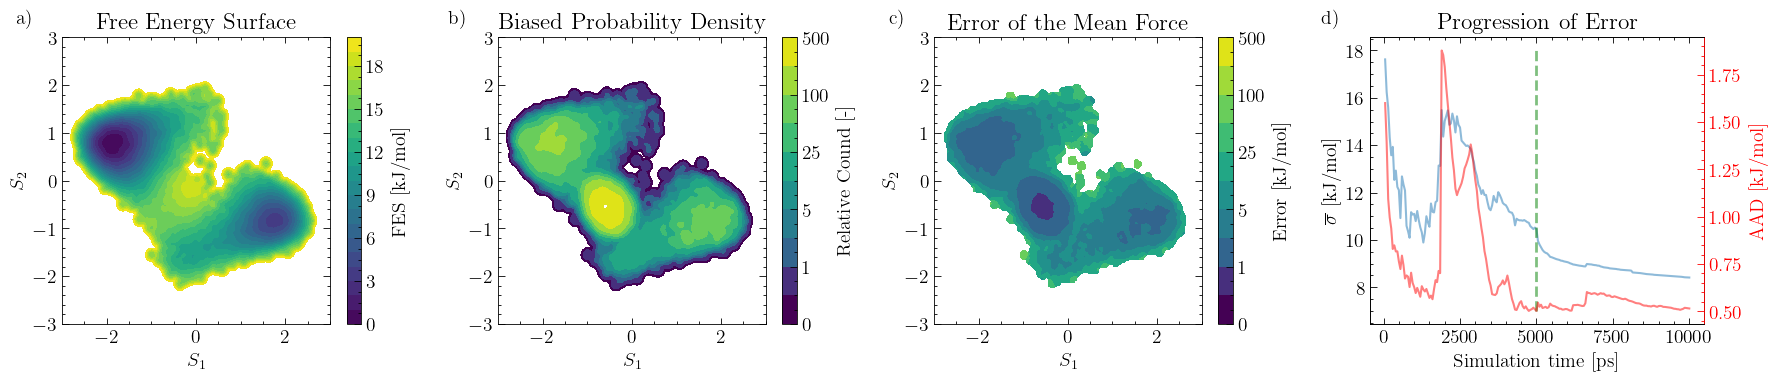

In [9]:
plt.rcParams.update({"font.size": 14})

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(18,4))

fig_fes = ax1.contourf(X,Y, FES_2, levels=np.linspace(0,20,21), cmap='viridis')
fig.colorbar(fig_fes, ax=ax1, label='FES [kJ/mol]')
ax1.set_title("Free Energy Surface"); ax1.set_xlabel("$S_1$"); ax1.set_ylabel("$S_2$")

PD_levels = [0.01, 0.1, 1, 2.5, 5, 10, 25, 50, 100, 225, 500]
PD_tick_loc = [0.01, 0.055, 0.1, 0.55, 1, 1.75, 2.5, 3.75, 5, 7.5, 10, 17.5, 25, 37.5, 50, 75, 100, 162.5, 225, 362.5, 500]

fig_PD = ax2.contourf(X,Y, MFI.zero_to_nan(Ftot_den_patch), levels=PD_levels, cmap='viridis', norm=colors.LogNorm(vmin=0.1, vmax=500))
cbar_PD = fig.colorbar(fig_PD, ax=ax2, label='Relative Cound [-]')
cbar_PD.ax.yaxis.set_minor_locator(ticker.FixedLocator(PD_tick_loc))
ax2.set_title("Biased Probability Density"); ax2.set_xlabel("$S_1$"); ax2.set_ylabel("$S_2$")

ofe_levels = [0.01, 0.1, 1, 2.5, 5, 10, 25, 50, 100, 225, 500]
ofe_tick_loc = [0.01, 0.055, 0.1, 0.55, 1, 1.75, 2.5, 3.75, 5, 7.5, 10, 17.5, 25, 37.5, 50, 75, 100, 162.5, 225, 362.5, 500]

fig_ofe = ax3.contourf(X,Y, MFI.zero_to_nan(ofe_2), levels=ofe_levels, cmap='viridis', norm=colors.LogNorm(vmin=0.1, vmax=500))
cbar_ofe = fig.colorbar(fig_ofe, ax=ax3, label='Error [kJ/mol]')
cbar_ofe.ax.yaxis.set_minor_locator(ticker.FixedLocator(ofe_tick_loc))
# ax3.contourf(X,Y, MFI.zero_to_nan(ofe_1), levels=np.linspace(20,100,21), cmap=yellow_cmap)
ax3.set_title("Error of the Mean Force"); ax3.set_xlabel("$S_1$"); ax3.set_ylabel("$S_2$")


ax4_twin = ax4.twinx()

ax4.plot(history_terms_2[3], history_terms_2[1], alpha=0.5)
ax4.plot([5000,5000], [7,18], c="g", alpha=0.5, linewidth=2, linestyle="dashed")
ax4_twin.plot(history_terms_2[3], history_terms_2[2], c="r", alpha=0.5)
ax4.set_title("Progression of Error"); ax4.set_xlabel("Simulation time [ps]"); ax4.set_ylabel("$\overline{\sigma}$ [kJ/mol]")
ax4_twin.set_ylabel("AAD [kJ/mol]", c="r"); ax4_twin.tick_params('y', which='both', colors='r'); ax4_twin.spines['right'].set_color('red') 

plt.tight_layout()
fig.text(0.015, 0.92, "a)")
fig.text(0.255, 0.92, "b)")
fig.text(0.5, 0.92, "c)")
fig.text(0.74, 0.92, "d)")

plt.savefig(path_manustript + "Figure_SI/Figure_SI_4", dpi=300, transparent=True)
plt.show()

Text(0, 0.5, '$S_2$')

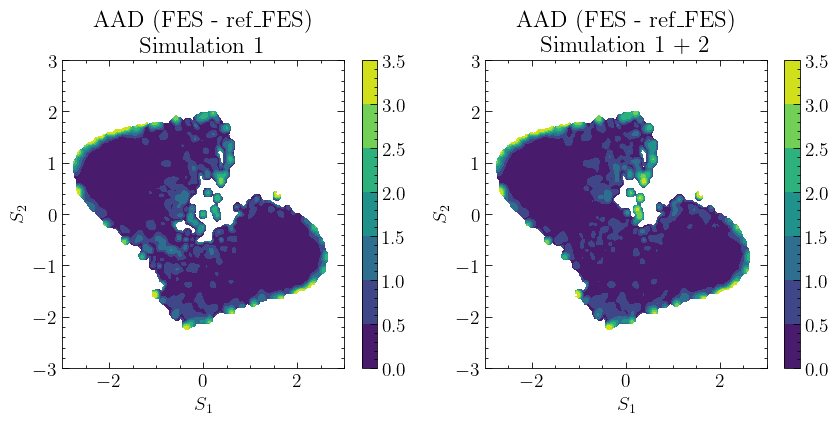

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(X,Y,MFI.zero_to_nan(abs(FES_1 - inve_pot)*cutoff_1), levels=np.linspace(0,3.5,8))
plt.colorbar(); plt.title("AAD (FES - ref_FES)\nSimulation 1"); plt.xlabel("$S_1$"); plt.ylabel("$S_2$")
plt.subplot(1,2,2)
plt.contourf(X,Y,MFI.zero_to_nan(abs(FES_2 - inve_pot)*cutoff_2), levels=np.linspace(0,3.5,8))
plt.colorbar(); plt.title("AAD (FES - ref_FES)\nSimulation 1 + 2"); plt.xlabel("$S_1$"); plt.ylabel("$S_2$")
